# Import Libraries and Data Set

### Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("C:/Users/HP/Downloads/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data.info()
# All the rows have data and contain no NaN values, and have correct datatypes hence no need to go ahead with EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Check Correlation

In [4]:
data.corr()
# Correlation is more than 0.8.
# Higher correlation suggests Linear regression may provide better predictions

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

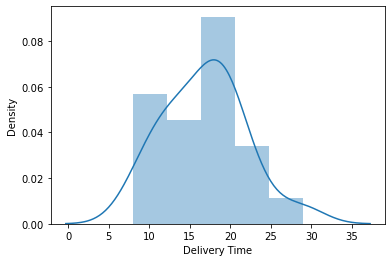

In [5]:
# Plot both columns
sns.distplot(data['Delivery Time'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

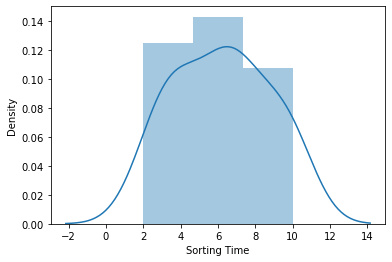

In [6]:
sns.distplot(data['Sorting Time'])
# Both distplots show that values are fairly normally distributed

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

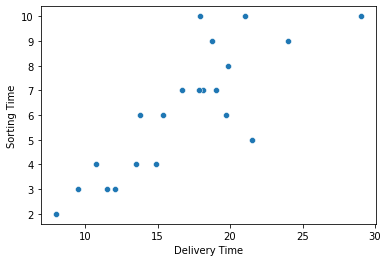

In [7]:
sns.scatterplot(x=data['Delivery Time'],y=data['Sorting Time'])


# Fitting a Linear Regression Model

### 1. For y~x

In [8]:
# Rename Dataset Columns
data = data.rename(columns = {"Delivery Time":"deliverytime"})
data = data.rename(columns = {"Sorting Time":"sortingtime"})
import statsmodels.formula.api as smf
model = smf.ols('deliverytime~sortingtime',data = data).fit()

In [9]:
data.head()

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


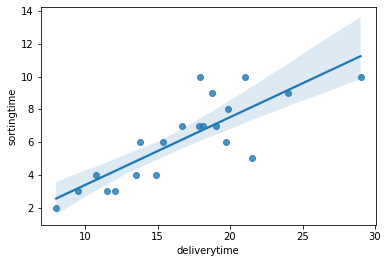

In [10]:
sns.regplot(x="deliverytime", y="sortingtime", data=data);

In [11]:
#Coefficients
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [12]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

#### Predict for original dataset

In [14]:
#Predict for the given dataset values of original dataset


In [15]:
model.predict(data)
# Predictions for input data

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

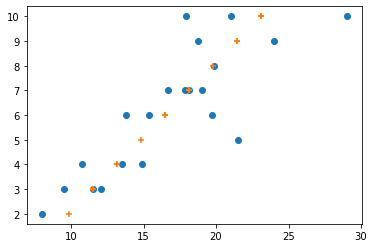

In [16]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(model.predict(data),data.sortingtime,marker='+')
plt.show()

### 2. for y~np.log(x)

In [126]:
y = data.deliverytime
x = data.sortingtime


In [127]:
model = smf.ols('y~np.log(x)',data = data).fit()

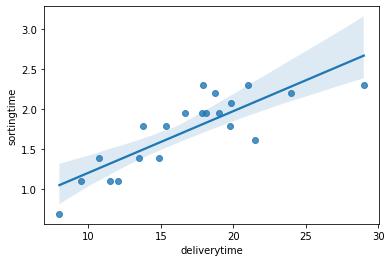

In [128]:
sns.regplot(x=y, y=np.log(x), data=data);

In [129]:
#Coefficients
model.params

Intercept    1.159684
np.log(x)    9.043413
dtype: float64

In [130]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for intercept is higher and for y-intercept is less than 0.05

Intercept    0.472460
np.log(x)    6.586789
dtype: float64 
 Intercept    0.641980
np.log(x)    0.000003
dtype: float64


In [131]:
#R squared values
(model.rsquared,model.rsquared_adj)
# rsquare values are better than y~x

(0.6954434611324223, 0.6794141696130761)

#### Predict for original dataset

In [132]:
#Predict for the given dataset values of original dataset


In [133]:
model.predict(data)
# Predictions for input data

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

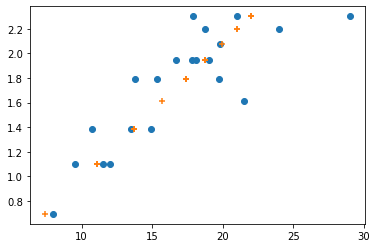

In [134]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,np.log(data.sortingtime))
plt.scatter(model.predict(data),np.log(data.sortingtime),marker='+')
plt.show()

### 3. for np.log(y)~x

In [26]:
y = data.deliverytime
x = data.sortingtime


In [27]:
model = smf.ols('np.log(y)~x',data = data).fit()

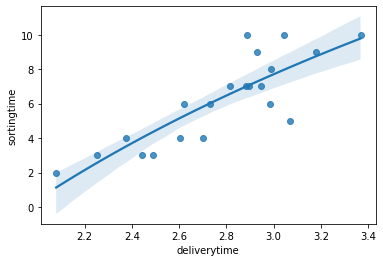

In [28]:
sns.regplot(x=np.log(y), y=x, data=data,logx=True);

In [29]:
#Coefficients
model.params

Intercept    2.121372
x            0.105552
dtype: float64

In [30]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept    20.601357
x             6.836088
dtype: float64 
 Intercept    1.857343e-14
x            1.592708e-06
dtype: float64


In [31]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

#### Predict for original dataset

In [32]:
#Predict for the given dataset values of original dataset


In [33]:
np.exp(model.predict(data))
# Predictions for input data = These predictions are way off the original data

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

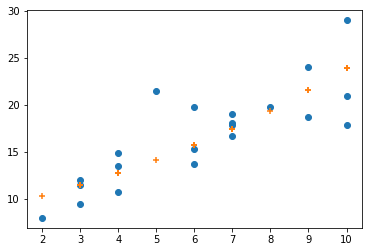

In [34]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.sortingtime,(data.deliverytime))
plt.scatter(data.sortingtime,np.exp(model.predict(data)),marker='+')
plt.show()

### 4. for np.log(y)~np.log(x)

In [35]:
y = data.deliverytime
x = data.sortingtime


In [36]:
model = smf.ols('np.log(y)~np.log(x)',data = data).fit()

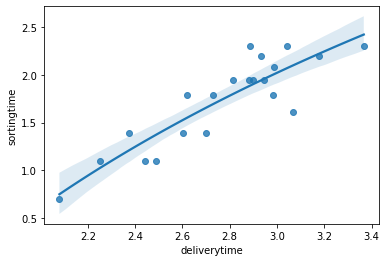

In [37]:
sns.regplot(x=np.log(y), y=np.log(x), data=data,logx=True);

In [38]:
#Coefficients
model.params

Intercept    1.741987
np.log(x)    0.597522
dtype: float64

In [39]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept    13.085552
np.log(x)     8.024484
dtype: float64 
 Intercept    5.921137e-11
np.log(x)    1.601539e-07
dtype: float64


In [40]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

#### Predict for original dataset

In [41]:
#Predict for the given dataset values of original dataset


In [42]:
np.exp(model.predict(data))
# Predictions for input data = output very far from original data

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

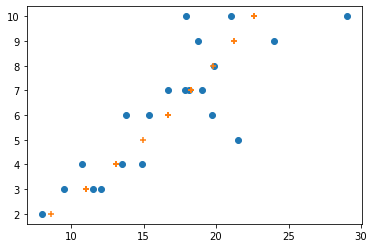

In [43]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(np.exp(model.predict(data)),data.sortingtime,marker='+')
plt.show()

### 5. for y~np.square(x)

In [44]:
y = data.deliverytime
x = data.sortingtime


In [45]:
model = smf.ols('y~np.square(x)',data = data).fit()

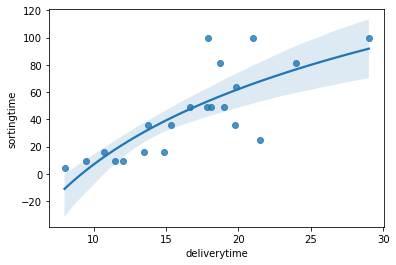

In [46]:
sns.regplot(x=y, y=np.square(x), data=data,logx=True);

In [47]:
#Coefficients
model.params

Intercept       11.237205
np.square(x)     0.124870
dtype: float64

In [48]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept       9.398601
np.square(x)    5.691330
dtype: float64 
 Intercept       1.415704e-08
np.square(x)    1.739194e-05
dtype: float64


In [49]:
#R squared values
(model.rsquared,model.rsquared_adj)
# r square values degrade as compared to y~x

(0.6302871815826637, 0.6108286121922777)

#### Predict for original dataset

In [50]:
#Predict for the given dataset values of original dataset


In [51]:
model.predict(data)
# Predictions for input data

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

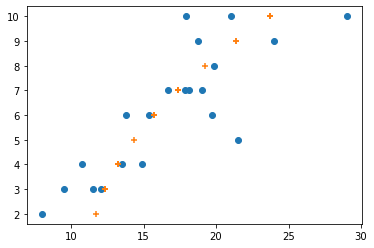

In [52]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(model.predict(data),data.sortingtime,marker='+')
plt.show()

### 6. for np.sq(y)~x

In [53]:
y = data.deliverytime
x = data.sortingtime


In [54]:
model = smf.ols('np.square(y)~x',data = data).fit()

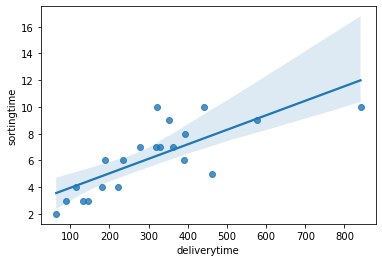

In [55]:
sns.regplot(x=np.square(y), y=x, data=data);

In [56]:
#Coefficients
model.params

Intercept   -37.440078
x            55.553783
dtype: float64

In [57]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for intercept high and for less than 0.05

Intercept   -0.542504
x            5.368383
dtype: float64 
 Intercept    0.593778
x            0.000035
dtype: float64


In [58]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6026728443618878, 0.5817608888019872)

#### Predict for original dataset

In [59]:
#Predict for the given dataset values of original dataset


In [60]:
np.sqrt(model.predict(data))
# Predictions for input data

0     22.761761
1     13.593199
2     17.201239
3     21.506835
4     22.761761
5     17.201239
6     18.746637
7     11.367553
8     22.761761
9     21.506835
10    20.173998
11    13.593199
12    18.746637
13    11.367553
14    11.367553
15    13.593199
16    17.201239
17    18.746637
18     8.582977
19    18.746637
20    15.502543
dtype: float64

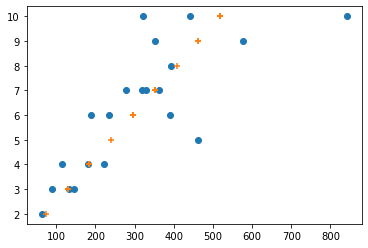

In [61]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(np.square(data.deliverytime),data.sortingtime)
plt.scatter(model.predict(data),data.sortingtime,marker='+')
plt.show()

### 7. for np.sq(y)~np.sq(x)

In [62]:
y = data.deliverytime
x = data.sortingtime


In [63]:
model = smf.ols('np.square(y)~np.square(x)',data = data).fit()

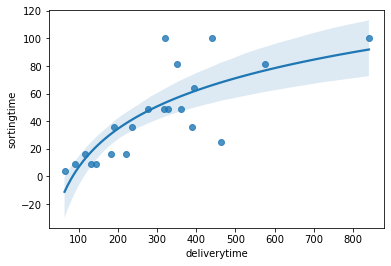

In [64]:
sns.regplot(x=np.square(y), y=np.square(x), data=data,logx=True);

In [65]:
#Coefficients
model.params

Intercept       114.154847
np.square(x)      4.323874
dtype: float64

In [66]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept       2.523810
np.square(x)    5.209376
dtype: float64 
 Intercept       0.020675
np.square(x)    0.000050
dtype: float64


In [67]:
#R squared values
(model.rsquared,model.rsquared_adj)
# r squared value goes further down

(0.5881883446986836, 0.566514047051246)

#### Predict for original dataset

In [68]:
#Predict for the given dataset values of original dataset


In [69]:
np.sqrt(model.predict(data))
# Predictions for input data = output inconsistent

0     23.378243
1     13.540193
2     16.426025
3     21.549678
4     23.378243
5     16.426025
6     18.056153
7     12.372135
8     23.378243
9     21.549678
10    19.770756
11    13.540193
12    18.056153
13    12.372135
14    12.372135
15    13.540193
16    16.426025
17    18.056153
18    11.465180
19    18.056153
20    14.908108
dtype: float64

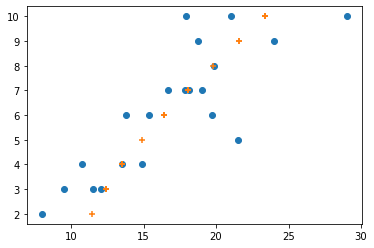

In [70]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(np.sqrt(model.predict(data)),data.sortingtime,marker='+')
plt.show()

### 8. for y~np.sqrt(x)

In [71]:
y = data.deliverytime
x = data.sortingtime


In [72]:
model = smf.ols('y~np.sqrt(x)',data = data).fit()

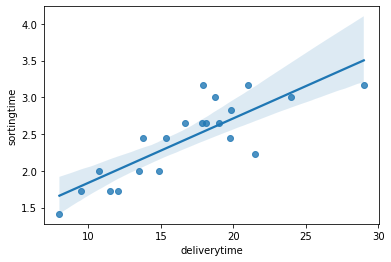

In [73]:
sns.regplot(x=y, y=np.sqrt(x), data=data);

In [74]:
#Coefficients
model.params

Intercept    -2.518837
np.sqrt(x)    7.936591
dtype: float64

In [75]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for intercept high and for y less than 0.05

Intercept    -0.840911
np.sqrt(x)    6.592434
dtype: float64 
 Intercept     0.410857
np.sqrt(x)    0.000003
dtype: float64


In [76]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

#### Predict for original dataset

In [77]:
#Predict for the given dataset values of original dataset


In [78]:
model.predict(data)
# Predictions for input data

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

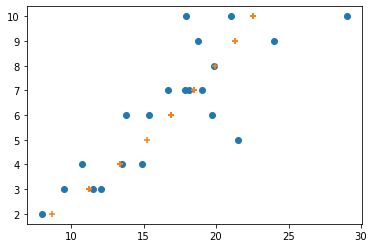

In [79]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(model.predict(data),data.sortingtime,marker='+')
plt.show()

### 9. for np.sqrt(y)~x

In [80]:
y = data.deliverytime
x = data.sortingtime


In [81]:
model = smf.ols('np.sqrt(y)~x',data = data).fit()

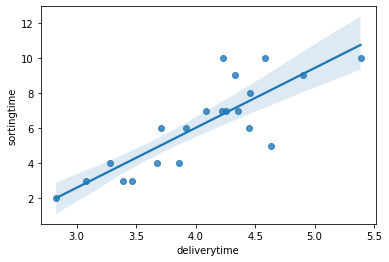

In [82]:
sns.regplot(x=np.sqrt(y), y=x, data=data);

In [83]:
#Coefficients
model.params

Intercept    2.772731
x            0.206632
dtype: float64

In [84]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept    13.527452
x             6.723095
dtype: float64 
 Intercept    3.339366e-11
x            2.001215e-06
dtype: float64


In [85]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.704049871541756, 0.6884735489913221)

#### Predict for original dataset

In [86]:
#Predict for the given dataset values of original dataset


In [87]:
np.square(model.predict(data))
# Predictions for input data but output inconsistent with original data

0     23.416397
1     12.954660
2     16.100332
3     21.459291
4     23.416397
5     16.100332
6     17.801258
7     11.509915
8     23.416397
9     21.459291
10    19.587578
11    12.954660
12    17.801258
13    11.509915
14    11.509915
15    12.954660
16    16.100332
17    17.801258
18    10.150562
19    17.801258
20    14.484800
dtype: float64

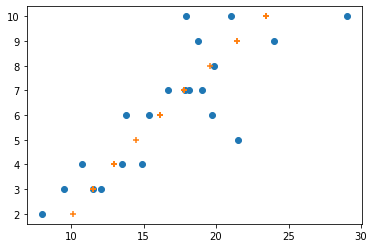

In [88]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(np.square(model.predict(data)),data.sortingtime,marker='+')
plt.show()

### 10. for np.sqrt(y)~np.sqrt(x)

In [89]:
y = data.deliverytime
x = data.sortingtime


In [90]:
model = smf.ols('np.sqrt(y)~np.sqrt(x)',data = data).fit()

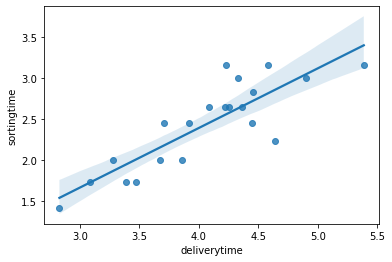

In [91]:
sns.regplot(x=np.sqrt(y), y=np.sqrt(x), data=data);

In [92]:
#Coefficients
model.params

Intercept     1.613479
np.sqrt(x)    1.002217
dtype: float64

In [93]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept     4.628248
np.sqrt(x)    7.152817
dtype: float64 
 Intercept     1.833621e-04
np.sqrt(x)    8.475706e-07
dtype: float64


In [94]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

#### Predict for original dataset

In [95]:
#Predict for the given dataset values of original dataset


In [96]:
np.square(model.predict(data))
# Predictions for input data

0     22.874858
1     13.089290
2     16.551868
3     21.345595
4     22.874858
5     16.551868
6     18.191038
7     11.218274
8     22.874858
9     21.345595
10    19.786270
11    13.089290
12    18.191038
13    11.218274
14    11.218274
15    13.089290
16    16.551868
17    18.191038
18     9.185915
19    18.191038
20    14.857199
dtype: float64

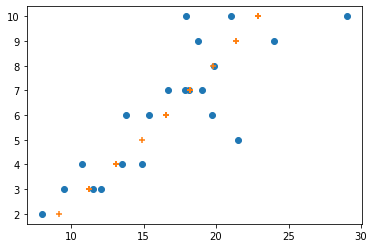

In [97]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(np.square(model.predict(data)),data.sortingtime,marker='+')
plt.show()

### 11. for y~np.power(x,3)

In [98]:
y = data.deliverytime
x = data.sortingtime


In [99]:
model = smf.ols('y~np.power(x,3)',data = data).fit()

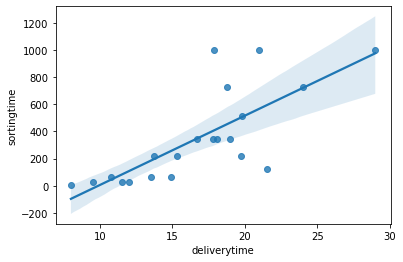

In [100]:
sns.regplot(x=y, y=np.power(x,3), data=data);

In [101]:
#Coefficients
model.params

Intercept         12.868192
np.power(x, 3)     0.011138
dtype: float64

In [102]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept         11.89017
np.power(x, 3)     5.00458
dtype: float64 
 Intercept         3.025690e-10
np.power(x, 3)    7.869103e-05
dtype: float64


In [103]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.5686309930618969, 0.5459273611177862)

#### Predict for original dataset

In [104]:
#Predict for the given dataset values of original dataset


In [105]:
model.predict(data)
# Predictions for input data

0     24.006370
1     13.581036
2     15.274039
3     20.987924
4     24.006370
5     15.274039
6     16.688587
7     13.168923
8     24.006370
9     20.987924
10    18.570939
11    13.581036
12    16.688587
13    13.168923
14    13.168923
15    13.581036
16    15.274039
17    16.688587
18    12.957298
19    16.688587
20    14.260465
dtype: float64

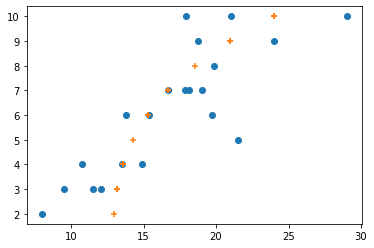

In [106]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter((model.predict(data)),data.sortingtime,marker='+')
plt.show()

### 12. for np.power(y,3)~x

In [107]:
y = data.deliverytime
x = data.sortingtime


In [108]:
model = smf.ols('np.power(y,3)~x',data = data).fit()

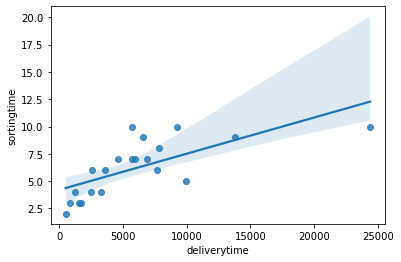

In [109]:
sns.regplot(x=np.power(y,3), y=x, data=data);

In [110]:
#Coefficients
model.params

Intercept   -3336.805822
x            1509.742400
dtype: float64

In [111]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept   -1.444311
x            4.358091
dtype: float64 
 Intercept    0.164941
x            0.000339
dtype: float64


In [112]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.4999073495787084, 0.4735866837670615)

#### Predict for original dataset

In [113]:
#Predict for the given dataset values of original dataset


In [114]:
np.cbrt(model.predict(data))
# Predictions for input data

0     22.741026
1     13.928485
2     17.885746
3     21.723026
4     22.741026
5     17.885746
6     19.337810
7     10.604168
8     22.741026
9     21.723026
10    20.599464
11    13.928485
12    19.337810
13    10.604168
14    10.604168
15    13.928485
16    17.885746
17    19.337810
18    -6.820763
19    19.337810
20    16.149518
dtype: float64

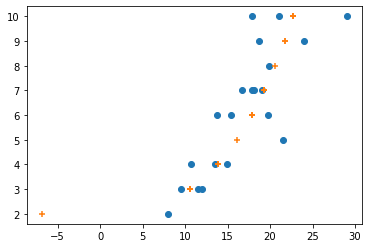

In [115]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(np.cbrt(model.predict(data)),data.sortingtime,marker='+')
plt.show()

### 13. for np.power(y,3)~np.power(x,3)

In [116]:
y = data.deliverytime
x = data.sortingtime


In [117]:
model = smf.ols('np.power(y,3)~np.power(x,3)',data = data).fit()

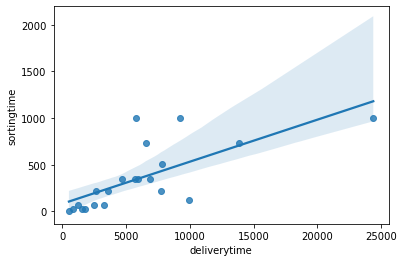

In [118]:
sns.regplot(x=np.power(y,3), y=np.power(x,3), data=data);

In [119]:
#Coefficients
model.params

Intercept         2047.955618
np.power(x, 3)      11.247502
dtype: float64

In [120]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept         1.654711
np.power(x, 3)    4.419168
dtype: float64 
 Intercept         0.114409
np.power(x, 3)    0.000295
dtype: float64


In [121]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.5068655571502552, 0.4809111127897423)

#### Predict for original dataset

In [122]:
#Predict for the given dataset values of original dataset


In [123]:
np.cbrt(model.predict(data))
# Predictions for input data

0     23.690147
1     14.040352
2     16.481971
3     21.720559
4     23.690147
5     16.481971
6     18.075658
7     13.298118
8     23.690147
9     21.720559
10    19.837582
11    14.040352
12    18.075658
13    13.298118
14    13.298118
15    14.040352
16    16.481971
17    18.075658
18    12.882442
19    18.075658
20    15.115980
dtype: float64

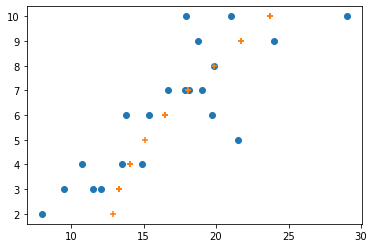

In [124]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.deliverytime,data.sortingtime)
plt.scatter(np.cbrt(model.predict(data)),data.sortingtime,marker='+')
plt.show()

### The transformation No 4. (for np.log(y)~np.log(x)) gives us the best r-squared value and hence can be adopted.